In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features].values
# X = df.loc[:, features].values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
# scale dữ liệu
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [8]:
pd.DataFrame(X_scale, columns=features).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [9]:
# giảm chiều với PCA --> 2 feature để trực quan
pca = PCA(n_components = 2)

In [10]:
principalFeatures = pca.fit_transform(X_scale)
principalFeatures[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [11]:
principalDF = pd.DataFrame(principalFeatures, columns=['features 1', 'features 2'])
principalDF.head()

,features 1,features 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [12]:
principalDF.shape

(150, 2)

In [13]:
df[['species']].head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [14]:
principalDF = pd.concat([principalDF, df[['species']]], axis=1)
principalDF.head()

,features 1,features 2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


### Visualization 2D Projection

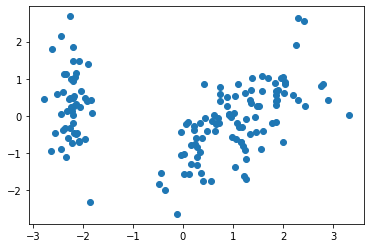

In [15]:
plt.scatter(principalDF['features 1'], principalDF['features 2'])
plt.show()

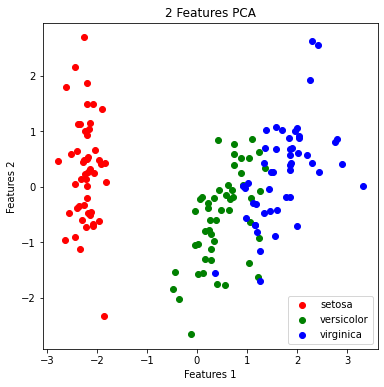

In [16]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Features 1')
ax.set_ylabel('Features 2')
ax.set_title('2 Features PCA')

colors = ['r', 'g', 'b']
tagets=['setosa', 'versicolor', 'virginica']

for target, color in zip(tagets, colors):
    df_target = principalDF[principalDF['species'] == target]
    ax.scatter(df_target['features 1'], df_target['features 2'], c = color)

ax.legend(tagets)
plt.show()

#### phân tích và nhận xét trên phương sai

In [17]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [18]:
# với 2 thành phần chính sau khi giảm chiều chứa ~ 95.81% thông tin của bộ dữ liệu
# trong đó thành phần thứ nhất chứa ~72.96% và thành phần 2 chứa ~22.85% thông tin của bộ dữ liệu

In [20]:
vects = pca.components_
vects

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

### với component 1

- High attribute: petal_length, petal_width và sepal_length
- Low attribute: sepal_width

In [22]:
com1 = pd.Series(vects[0], index = features)
com1.sort_values(ascending=False)

petal_length    0.580413
petal_width     0.564857
sepal_length    0.521066
sepal_width    -0.269347
dtype: float64

### với component 2

- High attribute: sepal_width
- Low attribute: petal_width và petal_length

In [23]:
com2 = pd.Series(vects[1], index = features)
com2.sort_values(ascending=False)

sepal_width     0.923296
sepal_length    0.377418
petal_width     0.066942
petal_length    0.024492
dtype: float64